https://colab.research.google.com/drive/1IimluHo-tjU1SXhNJV_RqwjHV-lvgRxh?usp=sharing

<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

ДЗ в колабе: https://colab.research.google.com/drive/18Hi97eESCrXYht-7SIoj_19pwcZhl17Y?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

Загружаем все необходимые библиотеки

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Открываем склонированную папку

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/IldarVS/DS_study/36ac897c24ba103867e7410abb1efda9c672b048/GrandHomeWork2/ThoraricSurgery.csv')


Отображаем данные

In [ ]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


## Работа с признаками

#### Визуальный анализ

Изучим наши данные, какие признаки исходного датасета никак не повлияют на результат прогноза? Выбросим такие столбцы и отобразим результат.

In [ ]:
df = df.drop(columns='id')

In [ ]:
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


Посмотрим на описательную статистику, которая суммирует центральную тенденцию, дисперсию и форму распределения набора данных. Корректно ли все заполнено?

In [ ]:
df.describe()

,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


Исследуем на наличие пропусков

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 62.5+ KB


Посмотрим на типы данных наших столбцов:

In [ ]:
df.dtypes

DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7        object
PRE8        object
PRE9        object
PRE10       object
PRE11       object
PRE14       object
PRE17       object
PRE19       object
PRE25       object
PRE30       object
PRE32       object
AGE          int64
Risk1Yr     object
dtype: object

Посмотрим как сбалансированны наши классы, можно распечатать или отобразить на графике. 
Можно увидеть, что данные несбалансированны.


DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64


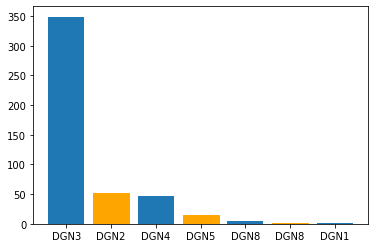

In [ ]:
df_counts = df['DGN'].value_counts()
print(df_counts)
# print(f'Процент данных показывающих целевую группу "отток" {round(df_counts[1]/(df_counts).sum(),2)}')
objects = ('DGN3', 'DGN2', 'DGN4', 'DGN5', 'DGN8', 'DGN8', 'DGN1')
y_pos = np.arange(len(objects))
barlist = plt.bar(y_pos, df_counts)
plt.xticks(y_pos, objects)
barlist[1].set_color('orange')
barlist[3].set_color('orange')
barlist[5].set_color('orange')
plt.show()

Удалим признак со значением меньше 6

In [ ]:
df = df.drop(df[df.DGN == "DGN1"].index)
df = df.drop(df[df.DGN == "DGN8"].index)
df = df.drop(df[df.DGN == "DGN6"].index)


In [ ]:
df_counts = df['DGN'].value_counts()
df_counts

DGN3    349
DGN2     52
DGN4     47
DGN5     15
Name: DGN, dtype: int64

#### Работа с категориальными признаками

категориальные признаки

Посмотрим на те колонки, в которых тип данных object (строка) и перекодируем их, воспользуемся кодом с занятия.

In [ ]:
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders
# закодируем значения
encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 


In [ ]:
encoded_data.head() 

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,0,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,1,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,1,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,1,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,1,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

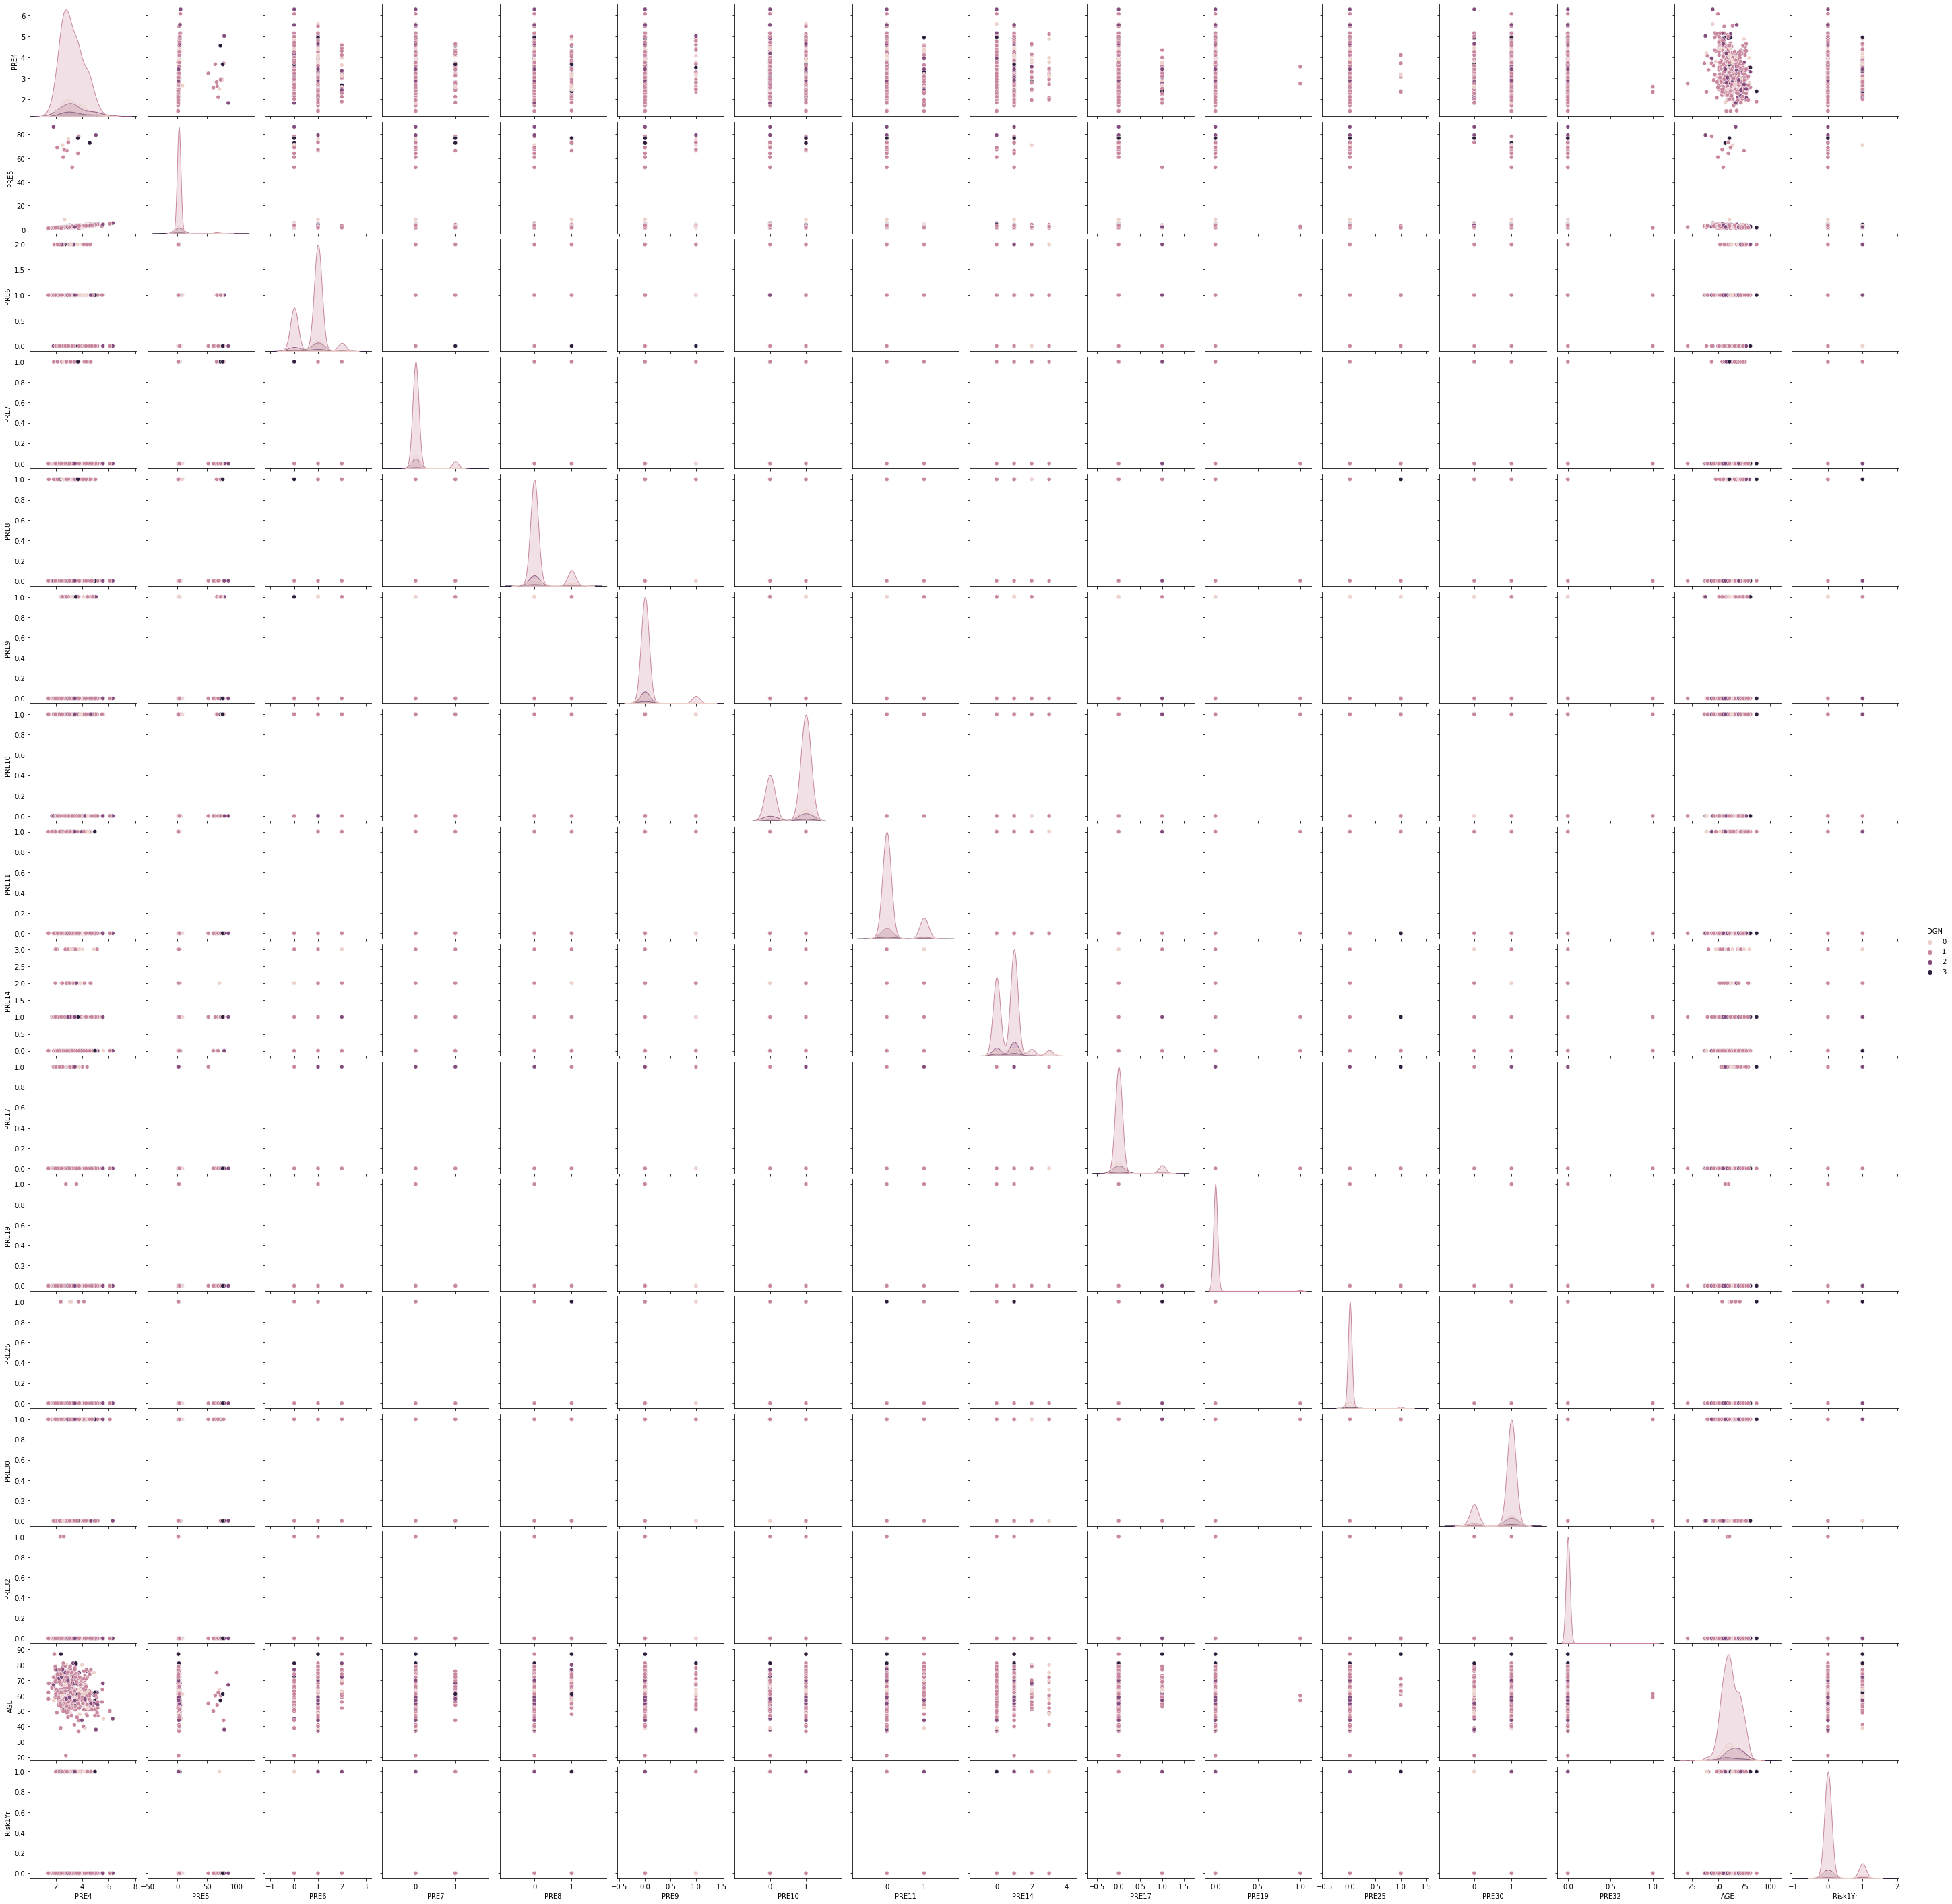

In [ ]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(encoded_data, hue="DGN")

Отобразим сами энкодеры

In [ ]:
encoders

{'DGN': LabelEncoder(),
 'PRE10': LabelEncoder(),
 'PRE11': LabelEncoder(),
 'PRE14': LabelEncoder(),
 'PRE17': LabelEncoder(),
 'PRE19': LabelEncoder(),
 'PRE25': LabelEncoder(),
 'PRE30': LabelEncoder(),
 'PRE32': LabelEncoder(),
 'PRE6': LabelEncoder(),
 'PRE7': LabelEncoder(),
 'PRE8': LabelEncoder(),
 'PRE9': LabelEncoder(),
 'Risk1Yr': LabelEncoder()}

In [ ]:
# выбросим колонку, которую будем предсказывать
X, y = encoded_data[encoded_data.columns[1:]].values, encoded_data[encoded_data.columns[0]].values


Посмотрим на распределение величин по признакам в наших данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f4bdb1438>,
      dtype=object)

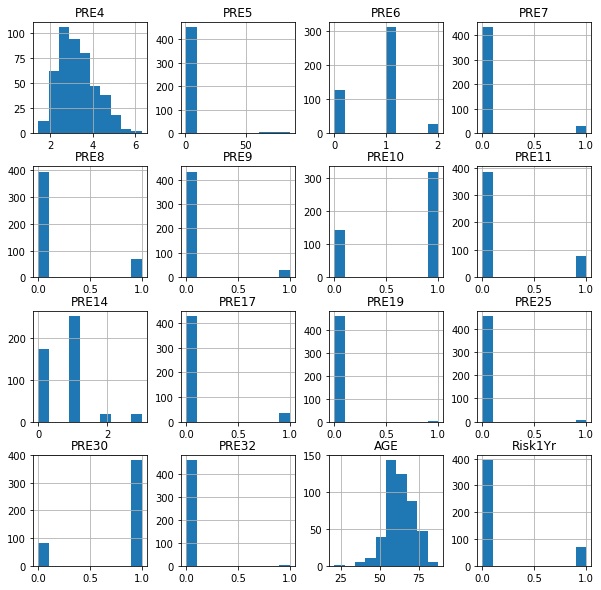

In [ ]:
encoded_data_new = encoded_data.drop(['DGN'], axis=1)
encoded_data_new.hist(figsize=(10,10))

Построим матрицу корреляций, если есть данные с единичной линейной зависимостью 

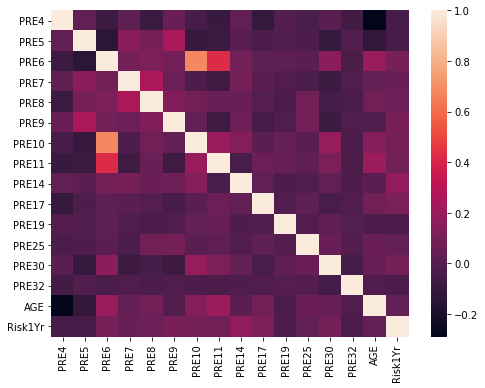

In [ ]:
encoded_data_corr = encoded_data_new.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(encoded_data_corr)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

разделим на train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train[:5]

array([[ 5.16,  4.96,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  , 54.  ,  0.  ],
       [ 2.64,  2.44,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  , 63.  ,  1.  ],
       [ 2.6 ,  2.12,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  , 55.  ,  0.  ],
       [ 2.21,  1.88,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  , 56.  ,  0.  ],
       [ 2.76,  1.76,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  1.  ,  0.  , 61.  ,  1.  ]])

In [ ]:
y_train[:5]

array([2, 1, 1, 0, 2])

Проведем аугментацию используя SMOTE ADASYN

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
augm = ADASYN()
X_train_augm, y_train_augm = augm.fit_resample(np.array(X_train), np.array(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_train).value_counts()

1    274
0     44
2     38
3     14
dtype: int64

In [ ]:
pd.Series(y_train_augm).value_counts()

0    285
1    274
3    272
2    270
dtype: int64

Линейная регрессия

In [ ]:
from sklearn import linear_model

# линейный классификатор
regr = linear_model.LinearRegression()

# обучаем
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# получаем предсказания
y_regr = regr.predict(X_test)

Рассчитаем R2

In [ ]:
metrics.r2_score(y_test, y_regr)

-0.19430074608738068

Рассчитаем MAE

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_regr)
print( mae)

0.32219320857008965


Используем 2 классификатора
умный kNN
глупый  DummyClassifier (самый популярный класс)


Будем использовать модель k ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

{'n_neighbors': 239} 0.3551707116412999


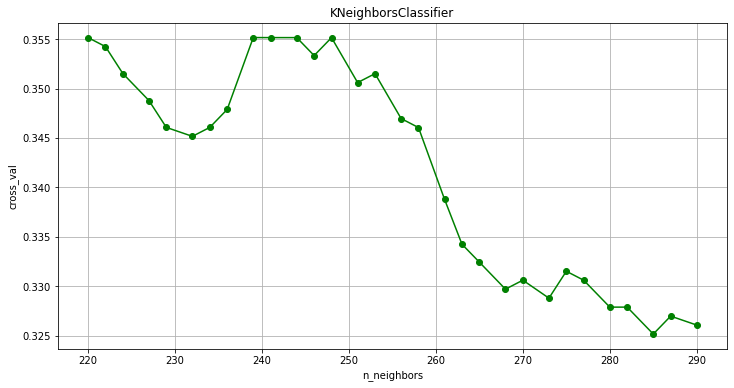

In [ ]:
from sklearn.model_selection import GridSearchCV
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(220, 290, 30), dtype='int')} 

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5)

# Обучаем его
gs.fit(X_train_augm, y_train_augm)
print(gs.best_params_, gs.best_score_)
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

{'n_neighbors': 208} 0.3678856437679967


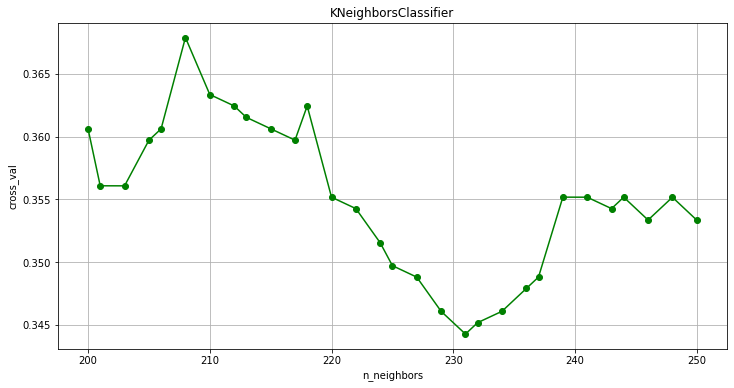

In [ ]:
# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(200, 250, 30), dtype='int')} 

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5)

# Обучаем его
gs.fit(X_train_augm, y_train_augm)
print(gs.best_params_, gs.best_score_)
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(n_neighbors=208) 
# тренируем для knn
clf_knn = knn.fit(X_train_augm, y_train_augm)
y_knn = clf_knn.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.06      0.25      0.10         8
           1       0.50      0.01      0.03        75
           2       0.14      0.22      0.17         9
           3       0.02      1.00      0.04         1

    accuracy                           0.06        93
   macro avg       0.18      0.37      0.09        93
weighted avg       0.42      0.06      0.05        93



Рассчитаем R2

In [ ]:
metrics.r2_score(y_test, y_knn)

-10.290123456790125

Рассчитаем MAE

In [ ]:
metrics.median_absolute_error(y_test, y_knn)

1.0

In [ ]:
from sklearn import dummy
# тренируем для dummy
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train_augm, y_train_augm)
y_mp = clf_mp.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_mp))

              precision    recall  f1-score   support

           0       0.09      1.00      0.16         8
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         1

    accuracy                           0.09        93
   macro avg       0.02      0.25      0.04        93
weighted avg       0.01      0.09      0.01        93



Рассчитаем R2

In [ ]:
metrics.r2_score(y_test, y_mp)

-4.740740740740742

Рассчитаем MAE

In [ ]:
metrics.median_absolute_error(y_test, y_mp)

1.0

##Используем логистическую регресию  и вычислим лучшие параметры с помощью  RandomizedSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
alg = LogisticRegression()
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(alg, distributions, random_state=0)
param = clf.fit(X_train_augm, y_train_augm)
param.best_params_

{'C': 2.4942547871438894, 'penalty': 'l2'}

In [ ]:
clf = LogisticRegression(C=2.4942547871438894,
                         penalty='l2')


In [ ]:
clf.fit(X_train_augm, y_train_augm)
y_clf = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_clf))

              precision    recall  f1-score   support

           0       0.10      0.12      0.11         8
           1       0.75      0.28      0.41        75
           2       0.03      0.11      0.05         9
           3       0.04      1.00      0.08         1

    accuracy                           0.26        93
   macro avg       0.23      0.38      0.16        93
weighted avg       0.62      0.26      0.34        93



Рассчитаем значения R2

In [ ]:
metrics.r2_score(y_test, y_clf)

-6.128086419753088

Рассчитаем MAE

In [ ]:
metrics.median_absolute_error(y_test, y_clf)

1.0

#SVM с использованием RandomizedSearchCV

##Создание полиномиальных

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def create_polinomial(X, degree = 2):
    return PolynomialFeatures(degree).fit_transform(X)

In [ ]:
X_train = create_polinomial(X_train, 2)
X_test = create_polinomial(X_test, 2)

Проведем аугементацию данных с помощью TomekLinks

In [ ]:
from imblearn.under_sampling import TomekLinks
def undersample_data(X, y):
    return TomekLinks().fit_resample(np.array(X), np.array(y))

In [ ]:
def augment_data(X, y):
    try:
        X, y = undersample_data(X, y)
    except:
        pass
    return X, y

In [ ]:
X_augm2, y_augm2 = augment_data(X_train, y_train)

In [ ]:
X_augm2.shape, y_augm2.shape

((301, 153), (301,))

In [ ]:
from sklearn.svm import SVC

In [ ]:
alg = SVC()

distributions = dict(C=uniform(loc=0, scale=4))
clf = RandomizedSearchCV(alg, distributions, random_state=0)
clf.fit(X_augm2, y_augm2)
clf.best_params_

{'C': 2.195254015709299}

In [ ]:
alg = SVC(C =  2.195254015709299)
alg.fit(X_augm2, y_augm2)
y_alg = alg.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_alg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.81      1.00      0.89        75
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         1

    accuracy                           0.81        93
   macro avg       0.20      0.25      0.22        93
weighted avg       0.65      0.81      0.72        93



Рассчитаем значения R2

In [ ]:
metrics.r2_score(y_test, y_alg)

-0.004629629629629761

Рассчитаем MAE

In [ ]:
metrics.median_absolute_error(y_test, y_alg)

0.0